# Noise Thresholding and Peak Picking
## Comparing Noise Filtering Methods for Mass Spectrometry Data

This notebook demonstrates various noise thresholding methods available in CoreMS for peak detection in mass spectrometry data.

### Overview
Proper noise thresholding is critical for accurate peak detection. CoreMS offers multiple methods:
- **log**: Based on log-normal distribution (recommended, Anal. Chem. 2014, 86, 7, 3308–3316)
- **minima**: Local minima-based thresholding
- **signal_noise**: Signal-to-noise ratio threshold
- **relative_abundance**: Relative intensity threshold
- **absolute_abundance**: Absolute intensity threshold

**Note:** Optimal thresholding method and parameters vary by data type and application.

**Author:** Will Kew, william.kew@pnnl.gov  
**Date:** April 2023

In [1]:
# Import CoreMS modules for reading Bruker ICR data and setting MS Parameters
from corems.transient.input.brukerSolarix import ReadBrukerSolarix
from corems.encapsulation.factory.parameters import MSParameters

# Import a plotting library for visualisation
import matplotlib.pyplot as plt


In [2]:
# Provide the file location 
datafile = '../../tests/tests_data/ftms/ESI_NEG_SRFA.d'
# Initiate the bruker reader object
bruker_reader = ReadBrukerSolarix(datafile)

In [3]:
# Set the new recommended method, which is 'log' 
# This is based on Anal. Chem. 2014, 86, 7, 3308–3316
MSParameters.mass_spectrum.noise_threshold_method = 'log'
MSParameters.mass_spectrum.noise_threshold_log_nsigma = 10

In [4]:
# Process the spectrum and return the mass spectrum object
mass_spectrum = bruker_reader.get_transient().get_mass_spectrum(plot_result=False,
                                          auto_process=True)
print("There were "+str(len(mass_spectrum))+' peaks detected.')

There were 2326 peaks detected.


<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

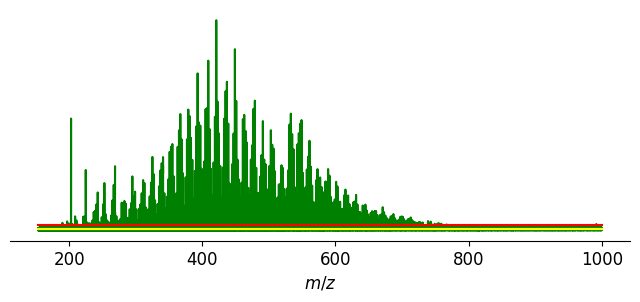

In [5]:
# Visualise the noise threshold level
fig,ax = plt.subplots(figsize=(8,3))
mass_spectrum.plot_profile_and_noise_threshold(ax=ax)

(-10000.0, 3000000.0)

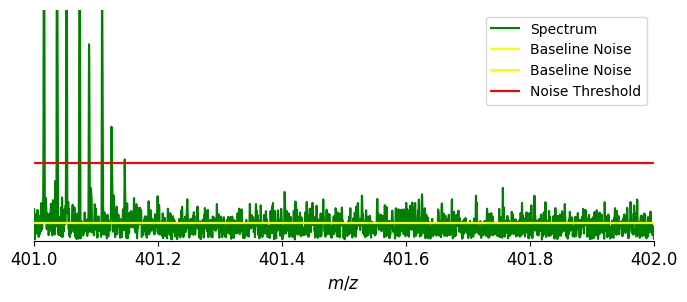

In [6]:
# Clearly we need to zoom in to see the noise better
fig,ax = plt.subplots(figsize=(8,3))
mass_spectrum.plot_profile_and_noise_threshold(ax=ax,legend=True)
ax.set_xlim(401.0,402)
ax.set_ylim(-1e4,3e6)

### Now lets contrast that method with some other approaches


There were 586 peaks detected.


(-10000.0, 3000000.0)

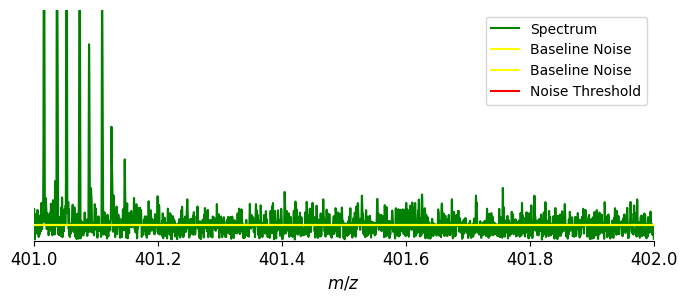

In [7]:
# The old default, 'minima' (previously known as 'auto')
MSParameters.mass_spectrum.noise_threshold_method = 'minima'
MSParameters.mass_spectrum.noise_threshold_min_std = 10

mass_spectrum = bruker_reader.get_transient().get_mass_spectrum(plot_result=False,
                                          auto_process=True)
print("There were "+str(len(mass_spectrum))+' peaks detected.')

fig,ax = plt.subplots(figsize=(8,3))
mass_spectrum.plot_profile_and_noise_threshold(ax=ax,legend=True)
ax.set_xlim(401.0,402)
ax.set_ylim(-1e4,3e6)

There were 3165 peaks detected.


(-10000.0, 3000000.0)

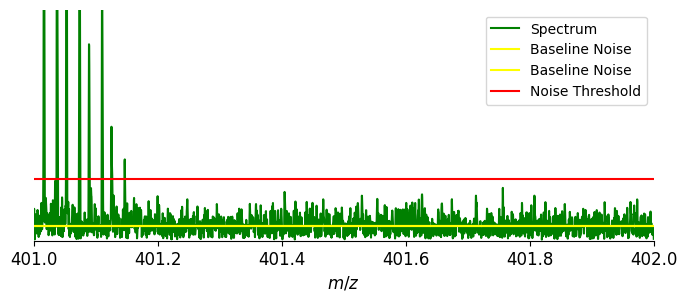

In [8]:
# Another option
MSParameters.mass_spectrum.noise_threshold_method = 'signal_noise'
MSParameters.mass_spectrum.noise_threshold_min_s2n = 3

mass_spectrum = bruker_reader.get_transient().get_mass_spectrum(plot_result=False,
                                          auto_process=True)
print("There were "+str(len(mass_spectrum))+' peaks detected.')

fig,ax = plt.subplots(figsize=(8,3))
mass_spectrum.plot_profile_and_noise_threshold(ax=ax,legend=True)
ax.set_xlim(401.0,402)
ax.set_ylim(-1e4,3e6)

There were 1034 peaks detected.


(-10000.0, 3000000.0)

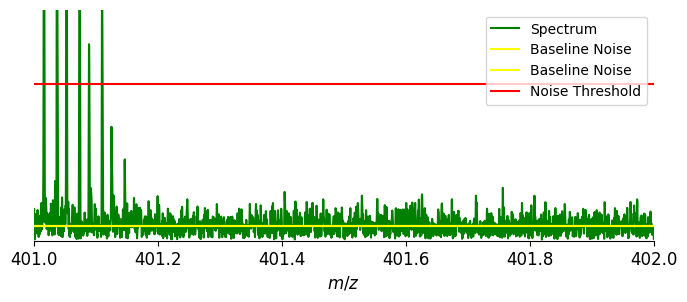

In [9]:
# Another option
MSParameters.mass_spectrum.noise_threshold_method = 'relative_abundance'
MSParameters.mass_spectrum.noise_threshold_min_relative_abundance = 5

mass_spectrum = bruker_reader.get_transient().get_mass_spectrum(plot_result=False,
                                          auto_process=True)
print("There were "+str(len(mass_spectrum))+' peaks detected.')

fig,ax = plt.subplots(figsize=(8,3))
mass_spectrum.plot_profile_and_noise_threshold(ax=ax,legend=True)
ax.set_xlim(401.0,402)
ax.set_ylim(-1e4,3e6)

There were 2342 peaks detected.


(-10000.0, 3000000.0)

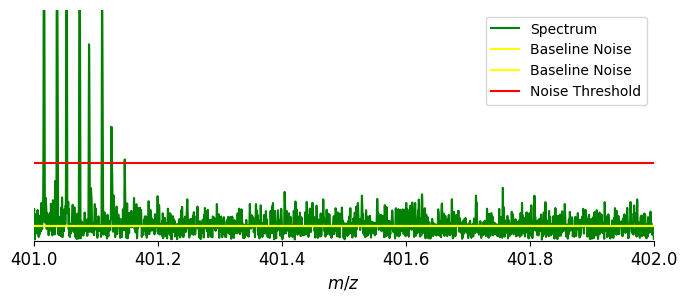

In [10]:
# Another option
MSParameters.mass_spectrum.noise_threshold_method = 'absolute_abundance'
MSParameters.mass_spectrum.noise_threshold_absolute_abundance = 1e6

mass_spectrum = bruker_reader.get_transient().get_mass_spectrum(plot_result=False,
                                          auto_process=True)
print("There were "+str(len(mass_spectrum))+' peaks detected.')

fig,ax = plt.subplots(figsize=(8,3))
mass_spectrum.plot_profile_and_noise_threshold(ax=ax,legend=True)
ax.set_xlim(401.0,402)
ax.set_ylim(-1e4,3e6)

### Other Considerations

- reduced profile data may work better with some (e.g. log) than other (e.g. minima) approaches
- Centroid data may not work with some methods at all (e.g. log)
- Very high dynamic range spectra may need some other parameters adjusted, such as: ```MSParameters.ms_peak.peak_min_prominence_percent = 0.01```
- if your spectral width is much wider than your area of interest, you can constrain the peak picking and noise thresholding to a certain m/z window, e.g.:
```MSParameters.mass_spectrum.min_noise_mz = 150
 MSParameters.mass_spectrum.max_noise_mz = 900
 MSParameters.mass_spectrum.min_picking_mz = 150
 MSParameters.mass_spectrum.max_picking_mz = 900```